In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.impute import SimpleImputer

from datetime import date

In [2]:
df = pd.read_csv('listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,2019-09-04,0.56,1,53
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.55,2,48
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,2017-07-03,0.03,1,354
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,2019-07-07,0.63,1,301
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,136,2019-07-10,1.19,1,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20832,38725567,Acogedor piso de 2 Hab. Hospital La paz 4 Torres,226958922,Cristóbal,Chamartín,Castilla,40.47847,-3.68395,Entire home/apt,100,1,0,NaN,NaN,4,108
20833,38726351,a 25-minutos del centro de Madrid near Subway,178608863,Rostyslav,Puente de Vallecas,Palomeras Sureste,40.38533,-3.63968,Private room,24,2,0,NaN,NaN,4,74
20834,38727654,Apartamento Confortable a 300 m de la Gran Vía.,182062359,Jose Maciel,Centro,Universidad,40.42182,-3.70336,Entire home/apt,75,2,0,NaN,NaN,2,196
20835,38728727,Estudio en pleno Lavapiés,31425029,Valeska,Centro,Embajadores,40.40896,-3.70107,Entire home/apt,45,2,0,NaN,NaN,1,104


In [3]:
df.shape

(20837, 16)

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [29]:
df.dtypes

number_of_reviews                 float64
calculated_host_listings_count    float64
availability_365                  float64
datetime_diff                     float64
room_type=0                       float64
room_type=1                       float64
room_type=2                       float64
room_type=3                       float64
price                             float64
dtype: object

In [30]:
df.isna().sum()

number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
datetime_diff                     0
room_type=0                       0
room_type=1                       0
room_type=2                       0
room_type=3                       0
price                             0
dtype: int64

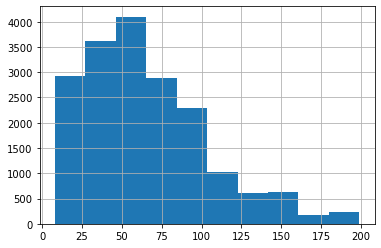

In [7]:
df = df.loc[df['price'] < 200]
df.price.hist()

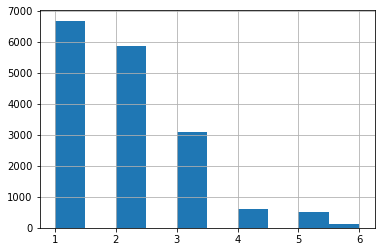

In [8]:
df = df.loc[df['minimum_nights'] < 7]
df.minimum_nights.hist()

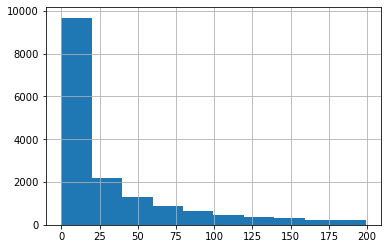

In [9]:
df = df.loc[df['number_of_reviews'] < 200]
df.number_of_reviews.hist()

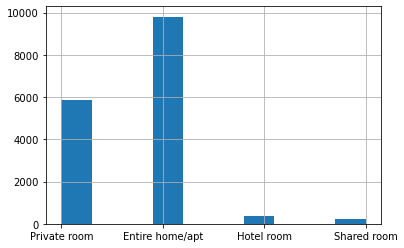

In [10]:
 df.room_type.hist()

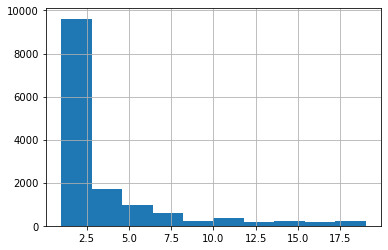

In [11]:
df = df.loc[df['calculated_host_listings_count'] < 20]
df.calculated_host_listings_count.hist() 

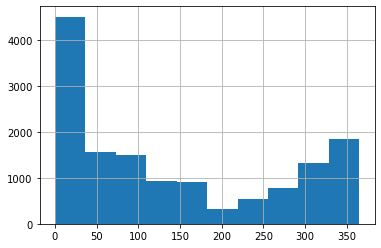

In [12]:
df.availability_365.hist()

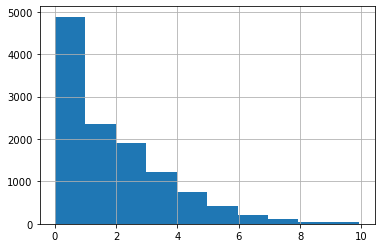

In [13]:
df = df.loc[df['reviews_per_month'] < 10]
df.reviews_per_month.hist()

In [14]:
df.apply(lambda x: (date.today() - date.fromisoformat(x['last_review'])).days, axis=1)

0         412
1         828
2        1205
3         471
4         468
         ... 
20720     397
20730     400
20743     402
20788     400
20807     398
Length: 11936, dtype: int64

In [15]:
print([val for val in df['last_review'] if isinstance(val, str)])

['2019-09-04', '2018-07-15', '2017-07-03', '2019-07-07', '2019-07-10', '2019-07-09', '2017-05-30', '2019-07-07', '2018-12-09', '2019-07-29', '2019-09-16', '2019-09-09', '2019-06-24', '2019-07-27', '2019-06-23', '2017-11-29', '2019-06-16', '2019-07-13', '2019-09-15', '2019-06-09', '2019-08-12', '2016-06-24', '2019-07-15', '2017-07-04', '2019-04-10', '2019-09-14', '2019-06-13', '2019-06-04', '2019-08-24', '2019-07-24', '2019-09-16', '2019-09-14', '2018-12-16', '2019-07-14', '2019-09-09', '2019-07-29', '2019-09-15', '2019-06-09', '2011-12-30', '2019-03-30', '2019-08-02', '2017-12-10', '2017-08-29', '2016-05-29', '2016-09-24', '2019-08-22', '2019-06-17', '2019-06-02', '2019-09-09', '2019-09-16', '2019-08-25', '2019-08-27', '2019-09-14', '2019-07-14', '2019-07-19', '2019-08-09', '2019-08-11', '2019-06-08', '2019-06-14', '2019-09-08', '2019-07-30', '2019-07-14', '2019-04-08', '2019-09-15', '2019-09-16', '2019-07-28', '2019-07-13', '2019-08-08', '2014-11-08', '2019-04-21', '2019-07-07', '2019

In [16]:
df['last_review'] = [date.fromisoformat(val) if isinstance(val, str) else val for val in df['last_review']]

In [17]:
df['datetime_diff'] = df.apply(lambda x: (date.today() - x['last_review']).days, axis=1)

In [18]:
df = df.drop(columns = ['last_review'], );
df = df.drop(columns = ['host_id']);
df = df.drop(columns = ['host_name']);
df = df.drop(columns = ['name']);
df = df.drop(columns = ['neighbourhood'], );
df = df.drop(columns = ['id'], );
df = df.drop(columns = ['neighbourhood_group'], )

In [19]:
df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,datetime_diff
0,40.45628,-3.67763,Private room,70,1,65,0.56,1,53,412
1,40.40341,-3.74084,Private room,17,4,33,0.55,2,48,828
2,40.42202,-3.70395,Entire home/apt,80,5,2,0.03,1,354,1205
3,40.41995,-3.69764,Entire home/apt,115,3,64,0.63,1,301,471
4,40.38985,-3.69011,Private room,25,2,136,1.19,1,337,468
...,...,...,...,...,...,...,...,...,...,...
20720,40.38460,-3.65037,Entire home/apt,39,2,2,2.00,1,48,397
20730,40.43574,-3.71222,Shared room,23,1,1,1.00,1,210,400
20743,40.39072,-3.72329,Entire home/apt,75,1,1,1.00,2,349,402
20788,40.41250,-3.71472,Entire home/apt,55,1,1,1.00,1,229,400


In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # sparse=False categorical_features=...
new_ohe_features = ohe.fit_transform(df.room_type.values.reshape(-1, 1))
tmp = pd.DataFrame(new_ohe_features, columns=['room_type=' + str(i) for i in range(new_ohe_features.shape[1])])
df = pd.concat([df, tmp], axis=1)
df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3
0,40.45628,-3.67763,Private room,70.0,1.0,65.0,0.56,1.0,53.0,412.0,0.0,0.0,1.0,0.0
1,40.40341,-3.74084,Private room,17.0,4.0,33.0,0.55,2.0,48.0,828.0,0.0,0.0,1.0,0.0
2,40.42202,-3.70395,Entire home/apt,80.0,5.0,2.0,0.03,1.0,354.0,1205.0,1.0,0.0,0.0,0.0
3,40.41995,-3.69764,Entire home/apt,115.0,3.0,64.0,0.63,1.0,301.0,471.0,1.0,0.0,0.0,0.0
4,40.38985,-3.69011,Private room,25.0,2.0,136.0,1.19,1.0,337.0,468.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20720,40.38460,-3.65037,Entire home/apt,39.0,2.0,2.0,2.00,1.0,48.0,397.0,NaN,NaN,NaN,NaN
20730,40.43574,-3.71222,Shared room,23.0,1.0,1.0,1.00,1.0,210.0,400.0,NaN,NaN,NaN,NaN
20743,40.39072,-3.72329,Entire home/apt,75.0,1.0,1.0,1.00,2.0,349.0,402.0,NaN,NaN,NaN,NaN
20788,40.41250,-3.71472,Entire home/apt,55.0,1.0,1.0,1.00,1.0,229.0,400.0,NaN,NaN,NaN,NaN


In [21]:
df = df.drop(columns = ['room_type'], );
df = df.drop(columns = ['latitude'], );  
df = df.drop(columns = ['longitude'], );
df = df.drop(columns = ['minimum_nights'], )

In [22]:
df

,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3
0,70.0,65.0,0.56,1.0,53.0,412.0,0.0,0.0,1.0,0.0
1,17.0,33.0,0.55,2.0,48.0,828.0,0.0,0.0,1.0,0.0
2,80.0,2.0,0.03,1.0,354.0,1205.0,1.0,0.0,0.0,0.0
3,115.0,64.0,0.63,1.0,301.0,471.0,1.0,0.0,0.0,0.0
4,25.0,136.0,1.19,1.0,337.0,468.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20720,39.0,2.0,2.00,1.0,48.0,397.0,NaN,NaN,NaN,NaN
20730,23.0,1.0,1.00,1.0,210.0,400.0,NaN,NaN,NaN,NaN
20743,75.0,1.0,1.00,2.0,349.0,402.0,NaN,NaN,NaN,NaN
20788,55.0,1.0,1.00,1.0,229.0,400.0,NaN,NaN,NaN,NaN


In [23]:
new_order = [1,3,4,5,6,7,8,9,0]
df = df[df.columns[new_order]]
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,412.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,828.0,0.0,0.0,1.0,0.0,17.0
2,2.0,1.0,354.0,1205.0,1.0,0.0,0.0,0.0,80.0
3,64.0,1.0,301.0,471.0,1.0,0.0,0.0,0.0,115.0
4,136.0,1.0,337.0,468.0,0.0,0.0,1.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...
20720,2.0,1.0,48.0,397.0,NaN,NaN,NaN,NaN,39.0
20730,1.0,1.0,210.0,400.0,NaN,NaN,NaN,NaN,23.0
20743,1.0,2.0,349.0,402.0,NaN,NaN,NaN,NaN,75.0
20788,1.0,1.0,229.0,400.0,NaN,NaN,NaN,NaN,55.0


In [24]:
df = df.loc[df['price'] < 200]
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,412.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,828.0,0.0,0.0,1.0,0.0,17.0
2,2.0,1.0,354.0,1205.0,1.0,0.0,0.0,0.0,80.0
3,64.0,1.0,301.0,471.0,1.0,0.0,0.0,0.0,115.0
4,136.0,1.0,337.0,468.0,0.0,0.0,1.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...
20720,2.0,1.0,48.0,397.0,NaN,NaN,NaN,NaN,39.0
20730,1.0,1.0,210.0,400.0,NaN,NaN,NaN,NaN,23.0
20743,1.0,2.0,349.0,402.0,NaN,NaN,NaN,NaN,75.0
20788,1.0,1.0,229.0,400.0,NaN,NaN,NaN,NaN,55.0


In [31]:
df.to_csv('listings_prepar.csv', sep=',', index=False)

In [26]:
df = df.dropna()

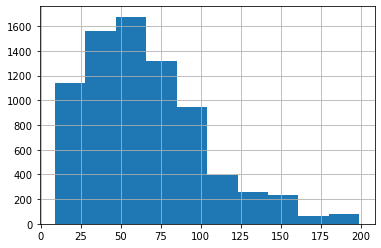

In [27]:
df.price.hist()

In [28]:
df.describe()

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
count,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,52.600391,3.172229,140.900782,591.367927,0.610691,0.011604,0.363233,0.014472,65.396089
std,49.952248,3.738650,128.069914,326.394433,0.487625,0.107100,0.480963,0.119434,36.858890
min,1.000000,1.000000,0.000000,398.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,10.000000,1.000000,9.000000,410.000000,0.000000,0.000000,0.000000,0.000000,35.000000
50%,38.000000,1.000000,104.000000,450.000000,1.000000,0.000000,0.000000,0.000000,60.000000
75%,81.000000,4.000000,271.000000,591.000000,1.000000,0.000000,1.000000,0.000000,85.000000
max,199.000000,19.000000,365.000000,3217.000000,1.000000,1.000000,1.000000,1.000000,199.000000
